In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
from os.path import join, abspath
import sys
from os import pardir, mkdir
from tqdm import tqdm

In [2]:
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if sys.path is not root_dir:
    sys.path.append(root_dir)

sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [24]:
from utils import safe_mkdir, phi_mod, style

In [25]:
style()

In [5]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [6]:
spectral_dir = join(root_data_dir, "Spectral-Class-v")
spectral_dir

'/home2/s20321005/Thesis-Project/Data/Spectral-Class-v'

In [7]:
name = "Velocity-Distribution-v"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution-v already exist. Good to go!


In [8]:
files = glob(join(spectral_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(-0.10)_(0.04).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.04)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.10)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.14)_(0.18).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.18)_(0.21).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.21)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.29)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-v/gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321

In [9]:
index = 3
gaia_raw = vaex.open(files[index])
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.012143285350383228,-0.05090636735876901,8.06,7.915,AAA,2448552098012705920,31.925608,-15.473064449157619,0.03462117,-27.925412691245555,0.017145172,5.743828297800484,0.03162395,8.575427,8.718618,8.305569,2121.3027,4497.2544,1.1130936,1.1753169,-1.4804480789660437,-1.1019347508945627,175.73,174.7979,176.8073,0.0174,0.0132,0.0214,F,--,1.9226019382476807,0.745744526386261,gaia,7142.38037109375,9.451171875,9.0673828125,0.0,gspphot,4.040999889373779,0.004399776458740234,0.003799915313720703,0.0,gspphot,-0.35260000824928284,0.009900003671646118,0.00830000638961792,0.0,gspphot,0.2800000011920929,nan,nan,nan,rave,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.14500046,1.8560076641998857,174.09991179279078,-155.31162157943774,78.67070286086846,-25.666719617373488,-18.985886903363205,0.032292736727151106,0.02120758345611108,-15.667791454769487,-21.18103896541238,-0.0880200230554166,-0.11962315390911099,-8.79494179484499,0.6664541256144392,-13.108206822765283,0.34600769000881776,19.911956430279062,0.12315768295089626,-14.965810665693192,0.34476543566107015,1.0002579192848187,2.4257564870891124
1,0.015392023766752952,0.08282170240683259,8.558,8.398,AAA,2741902384419052416,13.715906,4.639975154616401,0.022682155,-12.907234376349052,0.018533787,5.001793018338762,0.020396296,9.120099,9.266358,8.84375,1366.1663,1695.7045,0.9842217,1.1767597,-1.3757928446659748,-0.9789386987200558,194.4581,194.1627,195.9448,0.0445,0.0345,0.0519,F,--,20.480899810791016,0.42784982919692993,gaia,7309.1044921875,25.94287109375,20.001953125,0.0,gspphot,4.082799911499023,0.0076999664306640625,0.0012998580932617188,0.0,gspphot,-0.8805000185966492,0.015799999237060547,0.02110004425048828,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.15999985,2.0536281909628444,199.9283049765479,-165.92164671722244,111.54072924918852,0.10529109443016613,-13.715501539021382,0.022265241848635698,0.01903261390676254,-12.997634459602953,0.09978017598272111,-0.05598656204122589,0.02110380551514522,-24.24864378039954,0.3564462181215976,0.6395572033902752,0.24317908022658655,0.026037926233027392,0.05146861197348768,0.6467700722242922,0.23860515008815766,1.0587731232023627,2.507990604819711
2,0.010886019970416593,0.14809881412055007,5.077,4.91,AAA,2746883550050748288,104.96347,-93.86709820610827,0.07529715,-46.97124474797831,0.059896424,26.626807289488895,0.059652716,5.6357393,5.7814374,5.3413615,1286.0781,701.55164,0.91382813,1.1861782,-1.3472591136581011,-0.9156625705105482,37.7314,37.6538,37.8203,0.0,0.0,1e-04,F,--,10.91873836517334,0.13661456108093262,gaia,7074.23486328125,1.42138671875,1.4833984375,0.0,gspphot,4.057000160217285,0.0036001205444335938,0.00279998779296875,0.0,gspphot,-0.7408999800682068,0.023200035095214844,0.010899960994720459,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.1670003,2.2035956166574495,37.55613615736636,-29.780755668887814,22.88165105189412,-103.79716075576094,-15.603825744104398,0.07396018137361994,0.06153969109697727,-2.777731976009451,-18.477564231913245,-0.012599176705186203,-0.043439096225776214,-10.350568855849389,0.10860238843004742,4.449760305676502,0.08383196753192353,19.00425552701665,0.04625567004234596,0.2429374123330339,0.08231140170182588,1.0963220759909142,2.563

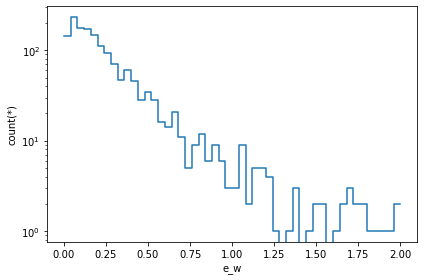

In [10]:
gaia_raw.viz.histogram("e_w", limits=[0, 2], shape=50)
plt.yscale("log")

In [11]:
gaia = gaia_raw.filter("abs(z)<50")#.filter("abs(w)>5")
gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
mask = (gaia['f']<0.1) | (gaia['e_w']<1)
gaia = gaia[mask]
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,f
0,0.010886019970416593,0.14809881412055007,5.077,4.91,AAA,2746883550050748288,104.96347,-93.86709820610827,0.07529715,-46.97124474797831,0.059896424,26.626807289488895,0.059652716,5.6357393,5.7814374,5.3413615,1286.0781,701.55164,0.91382813,1.1861782,-1.3472591136581011,-0.9156625705105482,37.7314,37.6538,37.8203,0.0,0.0,1e-04,F,--,10.91873836517334,0.13661456108093262,gaia,7074.23486328125,1.42138671875,1.4833984375,0.0,gspphot,4.057000160217285,0.0036001205444335938,0.00279998779296875,0.0,gspphot,-0.7408999800682068,0.023200035095214844,0.010899960994720459,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.1670003,2.2035956166574495,37.55613615736636,-29.780755668887814,22.88165105189412,-103.79716075576094,-15.603825744104398,0.07396018137361994,0.06153969109697727,-2.777731976009451,-18.477564231913245,-0.012599176705186203,-0.043439096225776214,-10.350568855849389,0.10860238843004742,4.449760305676502,0.08383196753192353,19.00425552701665,0.04625567004234596,0.2429374123330339,0.08231140170182588,1.0963220759909142,2.563654438942847,0.010492407706526511
1,0.033267110007025716,0.9342148139860511,7.7,7.542,AAA,396034952938583168,52.634007,52.58423640479397,0.014408187,2.288361982441815,0.015754921,7.345777500011441,0.018531658,8.299739,8.455629,8.000663,342.68124,518.9297,0.98550165,1.1826477,-1.110564382544859,-0.15334504215571013,135.8412,135.4889,136.1798,0.0007,1e-04,0.002,F,--,-5.3563103675842285,0.40865686535835266,gaia,6971.51318359375,1.85205078125,2.69482421875,0.0,gspphot,4.093800067901611,0.002399921417236328,0.0019998550415039062,0.0,gspphot,-0.24899999797344208,0.0106000155210495,0.009299993515014648,0.0,gspphot,0.6399999856948853,0.009999990463256836,0.020000040531158447,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.15799999,2.0301886574760335,136.13262857450317,-20.793547203076155,134.53520341277624,52.20024600775145,-6.743354919338899,0.014449403926133841,0.015717128433455362,-4.351275588951149,33.68318276402417,-0.014945075012324772,0.08548468486722863,-3.482067884573879,0.06414378742793156,-5.9580922493791295,0.40386800245382043,-32.824752829927164,0.1950470161260179,9.622435555562593,0.3638319065904273,1.0512265978657045,2.4926454475401085,0.018421176597991917
2,0.06611862221256655,0.6085647371642542,7.239,7.063,AAA,2876189725248409344,29.11195,20.485277396974784,0.028389314,-20.68475275532582,0.022625301,10.6049661831549,0.02477459,7.9101143,8.088605,7.5877233,2486.2273,2073.4092,0.93055826,1.1817399,-1.1422634649333387,-0.4784409692334587,93.8331,93.5952,94.0787,0.0005,1e-04,0.0013,F,--,-7.3523454666137695,0.28182855248451233,gaia,6776.58740234375,1.40966796875,1.70068359375,0.0,gspphot,4.13100004196167,0.0026998519897460938,0.003200054168701172,0.0,gspphot,-0.508400022983551,0.0059999823570251465,0.00820004940032959,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.17599964,2.366546283535639,94.29544448603865,-43.413223067490804,83.70736475192538,16.9582193845288,-23.662721354192485,0.02825962662274376,0.022787077700790154,-10.57629956397515,7.5796526357949645,-0.02672450538332918,0.021750414528565444,-6.003738087259977,0.13190363983900982,-11.396061833236994,0.25048545263292216,-11.629755785285703,0.1059493819452

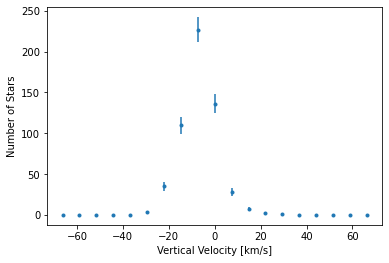

In [12]:
ws = gaia['w'].to_numpy()
wedge = np.linspace(-70, 70, 20)
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
werr = np.sqrt(wnum)
area = wnum.sum() * (wedge[1] - wedge[0])
plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.show()

In [96]:
# gaia_2 = gaia_raw.filter("abs(z)<200")
# gaia_2['f'] = gaia_raw.evaluate("e_w/abs(w)")
# mask = (gaia_2['f']<0.2)
# gaia_2 = gaia_2[mask]
# gaia_2 = gaia_2.extract()
# gaia_2

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,f
0,0.005220332152592599,-1.2472149363756106,9.679,9.292,AAA,4702044747287925888,5.953322,-4.878325554768022,0.012328528,-3.412328263413079,0.013413801,5.906541504010318,0.011774631,10.679057,11.017059,10.182057,1367.9883,2529.5535,0.9734569,1.1965036,2.2437111273254207,-0.7874142381555977,168.7038,168.3756,169.0502,0.0721,0.0702,0.0741,G,--,27.62563133239746,0.3174717426300049,gaia,5805.04541015625,3.2939453125,3.57666015625,0.0,gspphot,4.456299781799316,0.001399993896484375,0.0011000633239746094,0.0,gspphot,0.37929999828338623,0.0034999847412109375,0.003899991512298584,0.0,gspphot,0.10999999940395355,0.030000001192092896,0.019999995827674866,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.38700008,3.535666200843578,169.30381329260751,-119.95698715315031,119.47427517485526,3.7553728541694067,4.619439264862996,0.012413464985366399,0.013335236777091612,3.7071003565426492,3.013686997150049,0.013005222340576255,0.011633172738116492,-16.95758836676508,0.2251256911385725,22.12144426456764,0.22422280518725107,-11.430860769031623,0.14004669026873773,-19.17748752433899,0.17549393613104425,2.9564801601290416,4.251074279634666,0.013275808226350919
1,0.01234528975800905,-1.231587904025077,9.754,9.366,AAA,4702904286207624320,31.48447,31.093736648384194,0.014331686,-4.944838937083015,0.013836097,6.588620257673664,0.013783502,10.734539,11.055819,10.25146,1114.0681,1807.6669,1.0403253,1.1962733,2.2465928384637257,-0.8030835776899604,151.4281,151.1048,151.7459,0.0002,0.0,0.0006,G,--,17.690340042114258,0.28922533988952637,gaia,5792.77978515625,1.9619140625,2.11181640625,0.0,gspphot,4.427499771118164,0.002899646759033203,0.0029001235961914062,0.0,gspphot,-0.27799999713897705,0.005800008773803711,0.006399989128112793,0.0,gspphot,0.09000000357627869,0.04000000283122063,0.03999999165534973,0.0,gspspec,-0.2199999988079071,0.1599999964237213,0.12999999523162842,0.0,gspspec,-0.2199999988079071,nan,nan,nan,--,0.38799953,3.8479720962427164,151.776845665876,-109.20359622369978,105.40771059127644,-31.27491570549239,-3.6265049961509788,0.014296200205580537,0.013872760057340682,-2.60898837836877,-22.499870177125093,-0.011375328765021682,-0.048180656200071,-14.540137748021865,0.2082478308994546,10.408618805232711,0.20103118231855613,-24.06538885207155,0.1312472725530063,5.95319769692874,0.1597155763964895,2.976753810032051,4.256824848722696,0.014322273592475834
2,0.0045153064012494895,-1.0924962629351715,9.473,9.097,AAA,4904702229393600256,10.949072,6.8911403201005195,0.015984293,8.508487848203863,0.015616351,5.121154464258306,0.014408366,10.470099,10.792497,9.982636,1206.7808,1809.4757,1.1645453,1.1983753,2.3154694677958245,-0.9349712288025431,193.953,193.3452,194.63,0.0162,0.0087,0.0232,G,--,15.487279891967773,0.6039208769798279,gaia,5710.28271484375,13.8359375,12.634765625,0.0,gspphot,4.133500099182129,0.005199909210205078,0.005000114440917969,0.0,gspphot,-0.04089999943971634,0.017799999564886093,0.010599998757243156,0.0,gspphot,0.30000001192092896,0.030000001192092896,0.09999999403953552,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.37599945,3.0198389488633453,195.2684706113096,-157.10949523727822,115.95853621518138,-3.730566349214333,-10.293932926168578,0.015945366736672132,0.015656095210011996,-9.527781

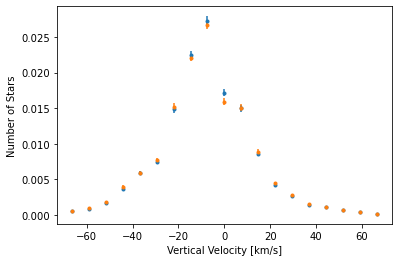

In [100]:
# for g in [gaia, gaia_2]:
#     ws = g['w'].to_numpy()
#     wedge = np.linspace(-70, 70, 20)
#     wmid = (wedge[1:] + wedge[:-1]) / 2
#     wnum, _ = np.histogram(ws, wedge)
#     werr = np.sqrt(wnum)
#     area = wnum.sum() * (wedge[1] - wedge[0])
#     plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')
#     plt.xlabel("Vertical Velocity [km/s]")
#     plt.ylabel("Number of Stars")
# plt.show()

In [16]:
# fit with double gaussian
from scipy.stats import norm
from scipy.optimize import curve_fit

def gaussian(x, mu, sigma, a):
    return abs(a)*norm.pdf(x, mu, sigma)

def double_gaussian(x, mu, sigma1, a1, sigma2, a2):
    return abs(a1)*norm.pdf(x, mu, sigma1) + abs(a2)*norm.pdf(x, mu, sigma2)

340 0


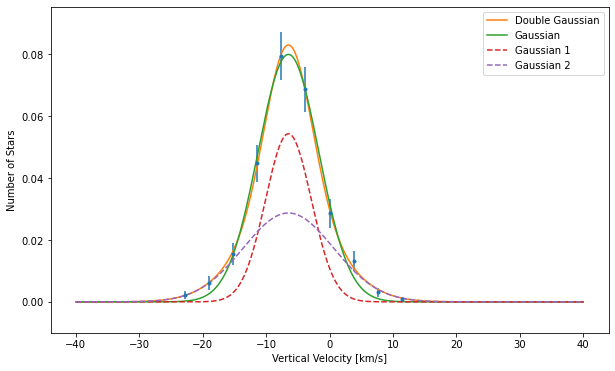

1: mu=-6.49, sigma=4.79, a=0.96
2: mu=-6.49, sigma1=3.62, a1=0.49, sigma2=7.12, a2=0.51


,mu,sigma,a,mu_2,sigma1_2,a1_2,sigma2_2,a2_2
0,-6.488673,4.790502,0.960555,-6.489688,3.617066,0.49266,7.1176,0.512368


In [18]:
index = int(input("Index: "))
gaia_raw = vaex.open(files[index])
gaia = gaia_raw.filter("abs(z)<50")
gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
mask = (gaia['f']<0.1) | (gaia['e_w']<1)
gaia = gaia[mask]
gaia = gaia.extract()
ws = gaia['w'].to_numpy()
wedge = np.linspace(-40, 40, 22)
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
mask = wnum > 0
wmid = wmid[mask]
wnum = wnum[mask]
print(len(ws), index)
area = wnum.sum() * (wedge[1] - wedge[0])

popt1, _ = curve_fit(gaussian, wmid, wnum/area, p0=[0, 10, 1])
popt2 = None
for i in range(100):
    # p0 = np.array([popt1[0], popt1[1]*0.8, popt1[2]*0.8, popt1[1]*1.2, popt1[2]/1.2])
    p0 = [popt1[0], popt1[1], 0.9, 50, 0.07]
    # noise = np.random.normal(0, 0.1, size=len(p0))
    popt, _ = curve_fit(double_gaussian, wmid, wnum/area, p0=p0, maxfev=5000)
    if popt[1] > 1 and popt[3] > 1:
        popt2 = popt
        break
    print('failed to fit', i)
    if i == 99:
        rnd = 0.5
        popt2 = np.array([popt1[0], popt1[1], rnd*popt1[2], popt1[1], (1-rnd)*popt1[2]])

ws = np.linspace(np.min(wedge),np.max(wedge), 1000)
fw1 = gaussian(ws, *popt1)
fw2 = double_gaussian(ws, *popt2)

werr = np.sqrt(wnum)
plt.figure(figsize=(10, 6))
plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')
plt.plot(ws, fw2, label="Double Gaussian")
plt.plot(ws, fw1, label="Gaussian")
plt.plot(ws, gaussian(ws, popt2[0], popt2[1], popt2[2]), label="Gaussian 1", ls="--")
plt.plot(ws, gaussian(ws, popt2[0], popt2[3], popt2[4]), label="Gaussian 2", ls="--")
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.ylim(-0.01, np.max(wnum/area)*1.2)
plt.legend()
# plt.yscale("log")
plt.show()
print("1: mu={:.2f}, sigma={:.2f}, a={:.2f}".format(*popt1))
print("2: mu={:.2f}, sigma1={:.2f}, a1={:.2f}, sigma2={:.2f}, a2={:.2f}".format(*popt2))

dic = {
        "mu": popt1[0],
        "sigma": popt1[1],
        "a": abs(popt1[2]),
        "mu_2": popt2[0],
        "sigma1_2": popt2[1],
        "a1_2": abs(popt2[2]),
        "sigma2_2": popt2[3],
        "a2_2": popt2[4],
    }
df = pd.DataFrame(dic, index=[index])
df

478 2


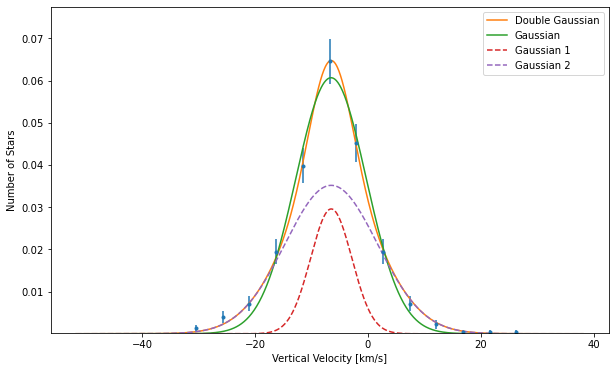

1: mu=-6.55, sigma=6.24, a=0.95
2: mu=-6.52, sigma1=3.65, a1=0.27, sigma2=8.18, a2=0.72


,mu,sigma,a,mu_2,sigma1_2,a1_2,sigma2_2,a2_2
2,-6.553694,6.239227,0.948675,-6.522535,3.648002,0.270384,8.180314,0.720984


In [19]:
# index = int(input("Index: "))
index = 2
gaia_raw = vaex.open(files[index])
gaia = gaia_raw.filter("abs(z)<50")
gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
mask = (gaia['f']<0.1) | (gaia['e_w']<1)
gaia = gaia[mask]
gaia = gaia.extract()
ws = gaia['w'].to_numpy()
wmean = np.mean(ws)
wstd = np.std(ws)
wedge = np.linspace(wmean-6*wstd, wmean+6*wstd, 20)
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
mask = wnum > 0
wmid = wmid[mask]
wnum = wnum[mask]
print(len(ws), index)
area = wnum.sum() * (wedge[1] - wedge[0])

popt1, _ = curve_fit(gaussian, wmid, wnum/area, p0=[0, 10, 1])
# p0 = [popt1[0], popt1[1], 0.9, 10, 0.2]
p0 = [popt1[0], 4, 0.6, 50, 0.4]
popt2, _ = curve_fit(double_gaussian, wmid, wnum/area, p0=p0, maxfev=5000)
ws = np.linspace(np.min(wedge), np.max(wedge), 1000)
fw1 = gaussian(ws, *popt1)
fw2 = double_gaussian(ws, *popt2)

werr = np.sqrt(wnum)
plt.figure(figsize=(10, 6))
plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')
plt.plot(ws, fw2, label="Double Gaussian")
plt.plot(ws, fw1, label="Gaussian")
plt.plot(ws, gaussian(ws, popt2[0], popt2[1], popt2[2]), label="Gaussian 1", ls="--")
plt.plot(ws, gaussian(ws, popt2[0], popt2[3], popt2[4]), label="Gaussian 2", ls="--")
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.ylim(np.min(wnum/area)*0.5, np.max(wnum/area)*1.2)
plt.legend()
# plt.yscale("log")
plt.show()
print("1: mu={:.2f}, sigma={:.2f}, a={:.2f}".format(*popt1))
print("2: mu={:.2f}, sigma1={:.2f}, a1={:.2f}, sigma2={:.2f}, a2={:.2f}".format(*popt2))

dic = {
        "mu": popt1[0],
        "sigma": popt1[1],
        "a": abs(popt1[2]),
        "mu_2": popt2[0],
        "sigma1_2": popt2[1],
        "a1_2": abs(popt2[2]),
        "sigma2_2": popt2[3],
        "a2_2": popt2[4],
    }
df = pd.DataFrame(dic, index=[index])
df

340 0


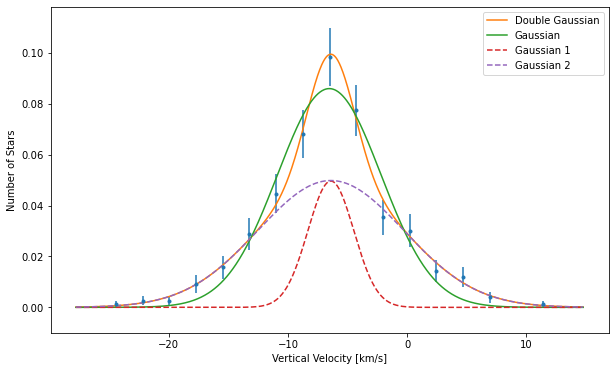

1: mu=-6.54, sigma=4.34, a=0.94
2: mu=-6.41, sigma1=1.93, a1=0.24, sigma2=6.12, a2=0.76
gaia_(-0.10)_(0.04).hdf5
418 1


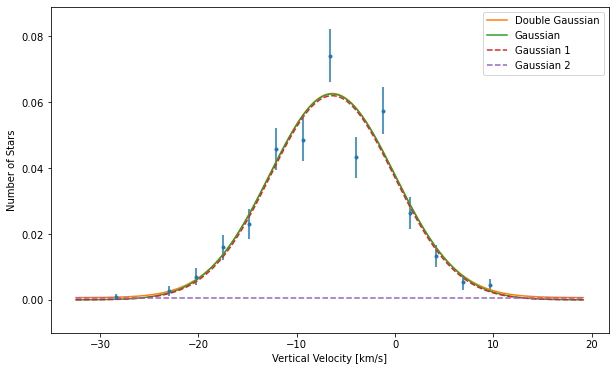

1: mu=-6.40, sigma=6.39, a=1.00
2: mu=-6.39, sigma1=6.30, a1=0.98, sigma2=6313.21, a2=10.70
gaia_(0.04)_(0.10).hdf5
478 2


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


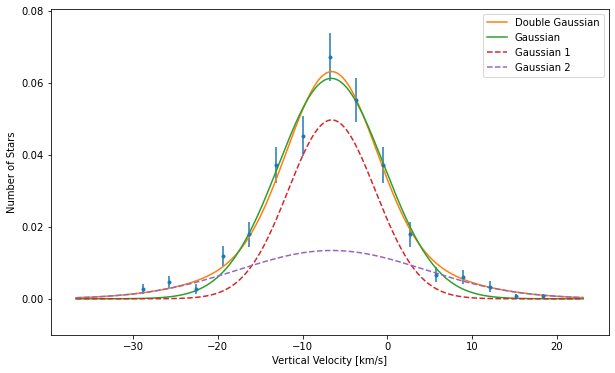

1: mu=-6.62, sigma=6.23, a=0.96
2: mu=-6.56, sigma1=5.14, a1=0.64, sigma2=10.93, a2=0.37
gaia_(0.10)_(0.14).hdf5
549 3


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


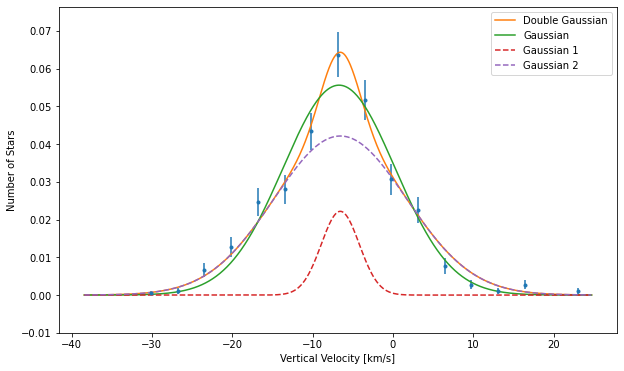

1: mu=-6.70, sigma=6.96, a=0.97
2: mu=-6.55, sigma1=2.37, a1=0.13, sigma2=8.23, a2=0.87
gaia_(0.14)_(0.18).hdf5
922 4


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


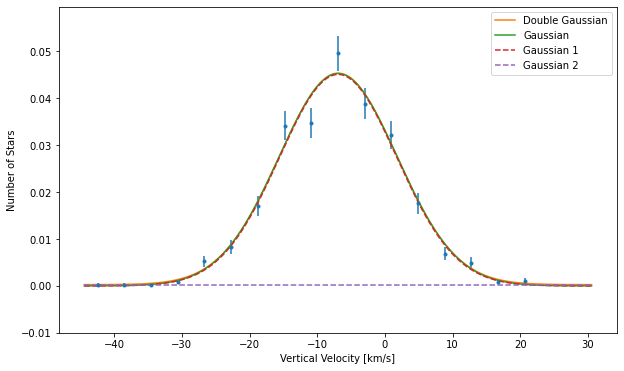

1: mu=-6.90, sigma=8.76, a=0.99
2: mu=-6.90, sigma1=8.69, a1=0.98, sigma2=3301.93, a2=2.22
gaia_(0.18)_(0.21).hdf5
1233 5


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


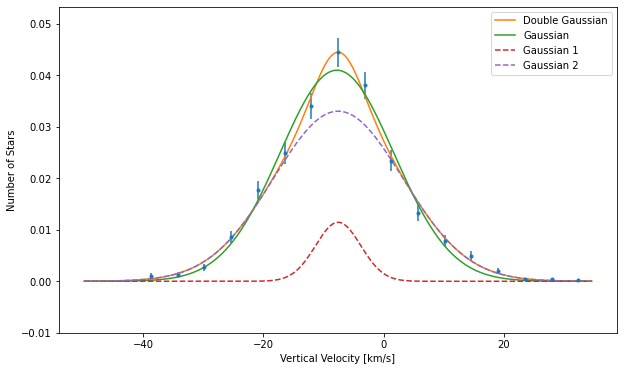

1: mu=-7.77, sigma=9.49, a=0.97
2: mu=-7.56, sigma1=3.76, a1=0.11, sigma2=10.75, a2=0.89
gaia_(0.21)_(0.24).hdf5
1644 6


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


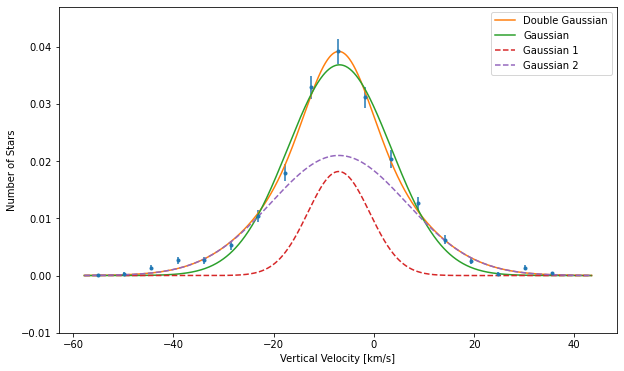

1: mu=-6.85, sigma=10.28, a=0.95
2: mu=-7.00, sigma1=6.16, a1=0.28, sigma2=13.49, a2=0.71
gaia_(0.24)_(0.27).hdf5
2031 7


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


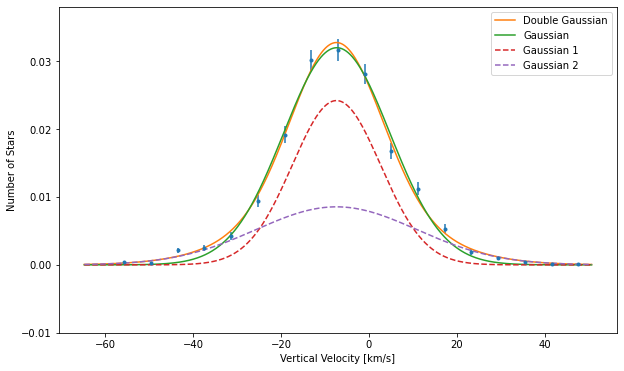

1: mu=-7.31, sigma=12.08, a=0.97
2: mu=-7.39, sigma1=10.06, a1=0.61, sigma2=18.31, a2=0.39
gaia_(0.27)_(0.29).hdf5
2291 8


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


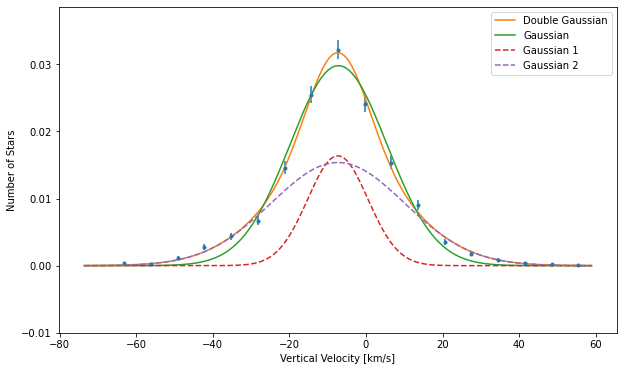

1: mu=-7.18, sigma=12.66, a=0.95
2: mu=-7.34, sigma1=7.86, a1=0.32, sigma2=17.43, a2=0.67
gaia_(0.29)_(0.32).hdf5
2329 9


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


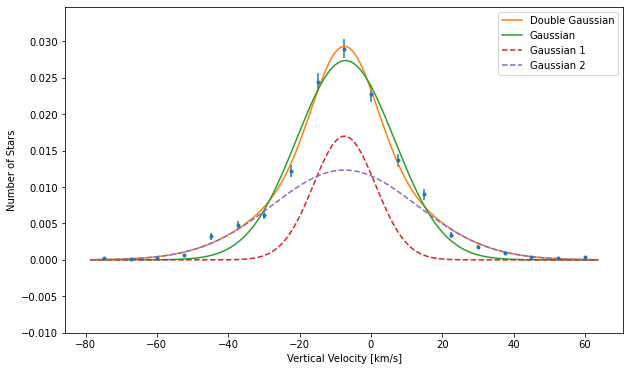

1: mu=-7.15, sigma=13.68, a=0.94
2: mu=-7.41, sigma1=8.70, a1=0.37, sigma2=20.33, a2=0.63
gaia_(0.32)_(0.34).hdf5
2476 10


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


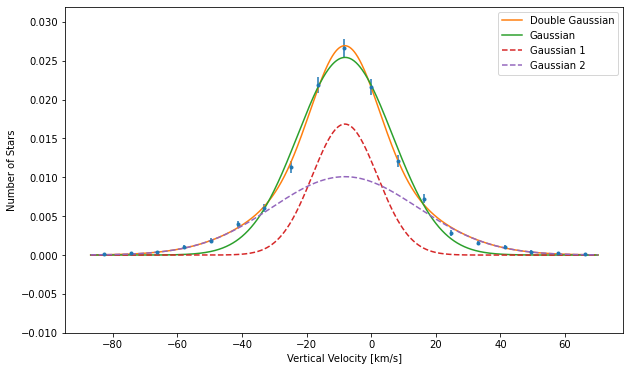

1: mu=-8.11, sigma=14.68, a=0.94
2: mu=-8.19, sigma1=10.06, a1=0.42, sigma2=22.60, a2=0.57
gaia_(0.34)_(0.36).hdf5
2613 11


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


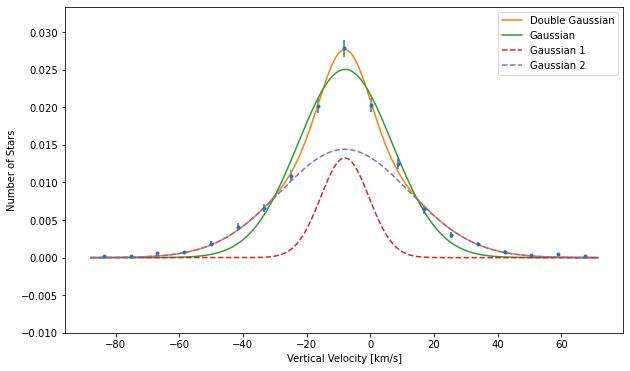

1: mu=-7.87, sigma=14.80, a=0.93
2: mu=-7.97, sigma1=7.59, a1=0.25, sigma2=20.32, a2=0.73
gaia_(0.36)_(0.38).hdf5
2204 12


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


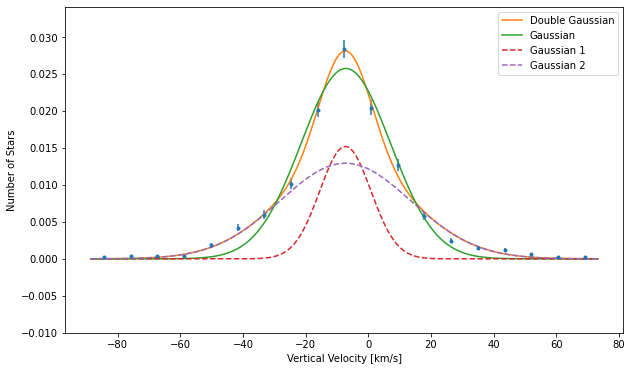

1: mu=-7.19, sigma=14.27, a=0.92
2: mu=-7.33, sigma1=8.14, a1=0.31, sigma2=20.88, a2=0.68
gaia_(0.38)_(0.40).hdf5


<ipython-input-20-a32c3d951875>:84: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dic, ignore_index=True)


,mu,sigma,a,mu_2,sigma1_2,a1_2,sigma2_2,a2_2
0,-6.544297,4.341397,0.935580,-6.411238,1.927639,0.239818,6.116562,0.764211
1,-6.397328,6.389583,1.000701,-6.393919,6.300207,0.978577,6313.212509,10.703758
2,-6.619881,6.225520,0.955401,-6.560668,5.138363,0.639892,10.934834,0.367897
3,-6.701129,6.961006,0.970638,-6.545303,2.368517,0.131755,8.233265,0.869948
4,-6.903640,8.761136,0.994710,-6.901686,8.688657,0.982316,3301.931119,2.218921
5,-7.773116,9.486578,0.974155,-7.559752,3.755247,0.107759,10.748739,0.889415
6,-6.854174,10.282938,0.948726,-7.003125,6.159106,0.280567,13.489701,0.709342
7,-7.314196,12.084140,0.968011,-7.388218,10.056973,0.609535,18.312909,0.392138
8,-7.177760,12.661177,0.945280,-7.344931,7.860893,0.322264,17.431803,0.671260
9,-7.146965,13.681248,0.937331,-7.408380,8.700976,0.370032,20.332257,0.627941


In [20]:
df = None
df_v = None

for index in range(13):
    gaia_raw = vaex.open(files[index])
    gaia = gaia_raw.filter("abs(z)<50")
    gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
    mask = (gaia['f']<0.1) | (gaia['e_w']<1)
    gaia = gaia[mask]
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    wmean = np.mean(ws)
    wstd = np.std(ws)
    wedge = np.linspace(wmean-4*wstd, wmean+4*wstd, 20)
    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = wnum > 0
    wmid = wmid[mask]
    wnum = wnum[mask]

    print(len(ws), index)
    area = wnum.sum() * (wedge[1] - wedge[0])

    popt1, _ = curve_fit(gaussian, wmid, wnum/area, p0=[0, 10, 1])
    popt2 = None
    double = False
    for i in range(100):
        try:
            # p0 = np.array([popt1[0], popt1[1]*0.8, popt1[2]*0.8, popt1[1]*2, popt1[2]/2])
            p0 = [popt1[0], popt1[1], 0.9, 50, 0.1]
            popt, _ = curve_fit(double_gaussian, wmid, wnum/area, p0=p0, maxfev=5000)
            if popt[1] > 1 and popt[3] > 1:
                popt2 = popt
                double = True
                break
            if i % 20 == 0:
                print('failed to fit', i)
            if i == 99:
                rnd = 0.5
                popt2 = np.array([popt1[0], popt1[1], rnd*popt1[2], popt1[1], (1-rnd)*popt1[2]])
        except RuntimeError:
            print("runtime error")
            rnd = 0.5
            popt2 = np.array([popt1[0], popt1[1], rnd*popt1[2], popt1[1], (1-rnd)*popt1[2]])
            break

    ws = np.linspace(np.min(wedge), np.max(wedge), 1000)
    fw1 = gaussian(ws, *popt1)
    fw2 = double_gaussian(ws, *popt2)

    werr = np.sqrt(wnum)
    plt.figure(figsize=(10, 6))
    plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')
    plt.plot(ws, fw2, label="Double Gaussian")
    plt.plot(ws, fw1, label="Gaussian")
    plt.plot(ws, gaussian(ws, popt2[0], popt2[1], popt2[2]), label="Gaussian 1", ls="--")
    plt.plot(ws, gaussian(ws, popt2[0], popt2[3], popt2[4]), label="Gaussian 2", ls="--")
    plt.xlabel("Vertical Velocity [km/s]") 
    plt.ylabel("Number of Stars")
    plt.ylim(-0.01, np.max(wnum/area)*1.2)
    plt.legend()
    plt.show()
    print("1: mu={:.2f}, sigma={:.2f}, a={:.2f}".format(*popt1))
    print("2: mu={:.2f}, sigma1={:.2f}, a1={:.2f}, sigma2={:.2f}, a2={:.2f}".format(*popt2))

    dic = {
        "mu": popt1[0],
        "sigma": popt1[1],
        "a": abs(popt1[2]),
        "mu_2": popt2[0],
        "sigma1_2": popt2[1],
        "a1_2": abs(popt2[2]),
        "sigma2_2": popt2[3],
        "a2_2": popt2[4],
    }
    dic_v = {
        'w': wmid,
        'num': wnum/area,
        'err': werr/area, 
    }
    if df is None:
        df = pd.DataFrame(dic, index=[0])
    else:
        df = df.append(dic, ignore_index=True)
    df_v = pd.DataFrame(dic_v)
    df_v = vaex.from_pandas(df_v)
    name = files[index]
    name = name.split('/')[-1]
    print(name)
    # df_v.export(join(data_dir, name), progress=True)
df 

In [21]:
df

,mu,sigma,a,mu_2,sigma1_2,a1_2,sigma2_2,a2_2
0,-6.544297,4.341397,0.935580,-6.411238,1.927639,0.239818,6.116562,0.764211
1,-6.397328,6.389583,1.000701,-6.393919,6.300207,0.978577,6313.212509,10.703758
2,-6.619881,6.225520,0.955401,-6.560668,5.138363,0.639892,10.934834,0.367897
3,-6.701129,6.961006,0.970638,-6.545303,2.368517,0.131755,8.233265,0.869948
4,-6.903640,8.761136,0.994710,-6.901686,8.688657,0.982316,3301.931119,2.218921
5,-7.773116,9.486578,0.974155,-7.559752,3.755247,0.107759,10.748739,0.889415
6,-6.854174,10.282938,0.948726,-7.003125,6.159106,0.280567,13.489701,0.709342
7,-7.314196,12.084140,0.968011,-7.388218,10.056973,0.609535,18.312909,0.392138
8,-7.177760,12.661177,0.945280,-7.344931,7.860893,0.322264,17.431803,0.671260
9,-7.146965,13.681248,0.937331,-7.408380,8.700976,0.370032,20.332257,0.627941


In [93]:
df_vaex = vaex.from_pandas(df)
df_vaex.export(join(data_dir, 'params.hdf5'), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 

['0.18', '0.21']
['0.38', '0.40']


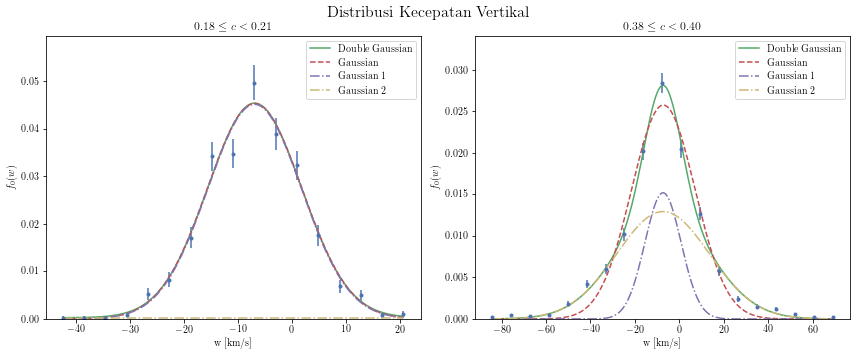

In [48]:
import re

# regex number between ()
regex = re.compile(r'\(([^)]+)\)')

def get_v(index):
    gaia_raw = vaex.open(files[index])
    gaia = gaia_raw.filter("abs(z)<50")
    gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
    mask = (gaia['f']<0.1) | (gaia['e_w']<1)
    gaia = gaia[mask]
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    wmean = np.mean(ws)
    wstd = np.std(ws)
    wedge = np.linspace(wmean-4*wstd, wmean+4*wstd, 20)
    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = wnum > 0
    wmid = wmid[mask]
    wnum = wnum[mask]
    werr = np.sqrt(wnum)

    # print(len(ws), index)
    area = wnum.sum() * (wedge[1] - wedge[0])
    return wmid, wnum/area, werr/area

w12, n12, e12 = get_v(12)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, ax in zip([4, 12], axes):
    wmid, wnum, werr = get_v(i)
    popt1 = df['mu'][i], df['sigma'][i], df['a'][i]
    popt2 = df['mu_2'][i], df['sigma1_2'][i], df['a1_2'][i], df['sigma2_2'][i], df['a2_2'][i]
    ws = np.linspace(np.min(wmid), np.max(wmid), 1000)
    fw1 = gaussian(ws, *popt1)
    fw2 = double_gaussian(ws, *popt2)
    name = files[i].split('/')[-1]
    c = re.findall(regex, name)
    print(c)

    ax.errorbar(wmid, wnum, yerr=werr, fmt='.')
    ax.plot(ws, fw2, label="Double Gaussian")
    ax.plot(ws, fw1, label="Gaussian", ls="--")
    ax.plot(ws, gaussian(ws, popt2[0], popt2[1], popt2[2]), label="Gaussian 1", ls="-.")
    ax.plot(ws, gaussian(ws, popt2[0], popt2[3], popt2[4]), label="Gaussian 2", ls="-.")
    ax.set_xlabel("w [km/s]")
    ax.set_ylabel(r"$f_0(w)$")
    ax.legend()
    ax.set_title(r"${}\leq c<{}$".format(c[0], c[1]))
    ax.set_ylim(0, np.max(wnum)*1.2)
fig.suptitle("Distribusi Kecepatan Vertikal", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig("w-dist.pdf", dpi=300)
plt.show()



In [16]:
def triple_gaussian(x, a1, mu1, sigma1, a2, mu2, sigma2, a3, mu3, sigma3):
    return a1*norm.pdf(x, mu1, sigma1) + a2*norm.pdf(x, mu2, sigma2) + a3*norm.pdf(x, mu3, sigma3)

In [17]:
def n_gaussian(x, *args):
    n = len(args) // 3
    y = 0
    for i in range(n):
        a, mu, sigma = args[3*i:3*i+3]
        y += a*norm.pdf(x, mu, sigma)
    return y

2476 10
[ 0.63643453 -8.20989156 21.30121475  0.38065748 -7.98318174  9.39640453]


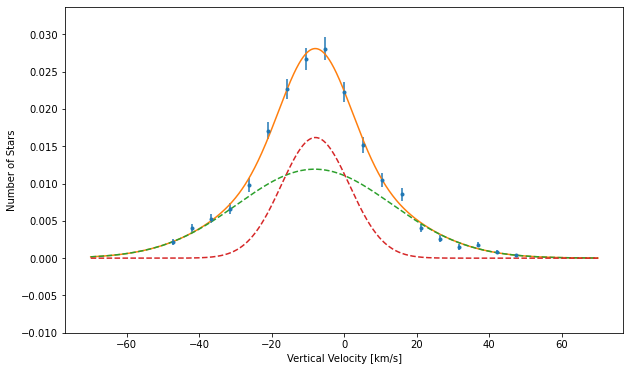

In [100]:
index = 10

plt.figure(figsize=(10, 6))
gaia_raw = vaex.open(files[index])
gaia = gaia_raw.filter("abs(z)<50")
gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
mask = (gaia['f']<0.1) | (gaia['e_w']<1)
gaia = gaia[mask]
gaia = gaia.extract()
ws = gaia['w'].to_numpy()
wedge = np.linspace(-50, 50, 20)
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
# mask = wnum > 0
# wmid = wmid[mask]
# wnum = wnum[mask]
print(len(ws), index)
area = wnum.sum() * (wedge[1] - wedge[0])
dim = 2
p1 = [1, -7, 10]
p2 = [0.1, -7, 5]
p0 = []
while True:
    if dim == 1:
        p0 = np.concatenate([p1])
    else:
        a_rest = np.random.rand(dim-2)+0.1
        mu_rest = np.random.rand(dim-2)*80-40
        sigma_rest = np.random.uniform(1, 10, dim-2)
        p_rest = np.array([(a, mu, sigma) for a, mu, sigma in zip(a_rest, mu_rest, sigma_rest)]).flatten()
        p0 = np.concatenate([p1, p2, p_rest])
    popt, pcov = curve_fit(n_gaussian, wmid, wnum/area, p0=p0, maxfev = 10000)
    a_fit = popt[::3]
    mu_fit = popt[1::3]
    sigma_fit = popt[2::3]
    # print(a_fit, mu_fit, sigma_fit)
    if np.all(a_fit > 0):
        break
ws = np.linspace(-70, 70, 1000)
fw = n_gaussian(ws, *popt)

werr = np.sqrt(wnum)
print(popt)
plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')
plt.plot(ws, fw)
for i in range(len(popt)//3):
    plt.plot(ws, popt[3*i]*norm.pdf(ws, popt[3*i+1], popt[3*i+2]), '--')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.ylim(-0.01, np.max(wnum/area)*1.2)
plt.show()

In [17]:
# # find the mean and sigma of the distribution
# f = lambda x: n_gaussian(x, *popt)

# mu = np.trapz(ws*f(ws), ws)
# sigma = np.sqrt(np.trapz((ws-mu)**2*f(ws), ws))
# print(mu, sigma)

-7.146035389735141 11.060332034451202


In [82]:
# 0
popt_s = """
 0.95842138 -6.26322367  4.82314417
"""
popt_0 = np.fromstring(popt_s, sep=' ')
popt_0

array([ 0.95842138, -6.26322367,  4.82314417])

In [32]:
# 1
popt_s = """
 0.9988395  -6.38133606  6.44501071
"""
popt_1 = np.fromstring(popt_s, sep=' ')
popt_1

array([ 0.9988395 , -6.38133606,  6.44501071])

In [34]:
# 2
popt_s = """
0.26054393 -10.51241144  12.67073585   0.75303096  -6.34623867
   5.64839176
"""

popt_2 = np.fromstring(popt_s, sep=' ')
popt_2

array([ 0.95820436, -6.64731666,  6.40233911])

In [42]:
# 3
popt_s = """
0.96900184 -6.60485374  7.02125157
"""
popt_3 = np.fromstring(popt_s, sep=' ')
popt_3

array([ 0.96900184, -6.60485374,  7.02125157])

In [44]:
# 4
popt_s = """
0.99653102 -6.84851253  8.59809841
  """
popt_4 = np.fromstring(popt_s, sep=' ')
popt_4

array([ 0.99653102, -6.84851253,  8.59809841])

In [66]:
# 5
popt_s = """
0.99056333 -7.69535485  9.42788559
  """
popt_5 = np.fromstring(popt_s, sep=' ')
popt_5

array([ 0.99056333, -7.69535485,  9.42788559])

In [95]:
# 6
popt_s = """
0.5313801  -6.7145192  15.10582341  0.46613444 -6.70622469  7.95089686
  """
popt_6 = np.fromstring(popt_s, sep=' ')
popt_6

array([ 0.5313801 , -6.7145192 , 15.10582341,  0.46613444, -6.70622469,
        7.95089686])

In [96]:
# 7
popt_s = """
0.69161445 -6.12414536 14.78195505  0.30412894 -8.56012599  8.36943772
  """
popt_7 = np.fromstring(popt_s, sep=' ')
popt_7

array([ 0.69161445, -6.12414536, 14.78195505,  0.30412894, -8.56012599,
        8.36943772])

In [97]:
# 8
popt_s = """
 0.58576915 -6.64314101 18.63739323  0.41902009 -7.39157755  8.70753481
  """
popt_8 = np.fromstring(popt_s, sep=' ')
popt_8

array([ 0.58576915, -6.64314101, 18.63739323,  0.41902009, -7.39157755,
        8.70753481])

In [99]:
# 9
popt_s = """
0.70038045 -6.05893389 18.55729806  0.30163806 -8.33189244  7.85226623
  """
popt_9 = np.fromstring(popt_s, sep=' ')
popt_9

array([ 0.70038045, -6.05893389, 18.55729806,  0.30163806, -8.33189244,
        7.85226623])

In [101]:
# 10
popt_s = """
0.63643453 -8.20989156 21.30121475  0.38065748 -7.98318174  9.39640453
  """
popt_10 = np.fromstring(popt_s, sep=' ')
popt_10

array([ 0.63643453, -8.20989156, 21.30121475,  0.38065748, -7.98318174,
        9.39640453])

In [102]:
# 11
popt_s = """
0.70038    -8.02041493 20.81939191  0.31529975 -7.89740015  8.13131668
  """
popt_11 = np.fromstring(popt_s, sep=' ')
popt_11

array([ 0.70038   , -8.02041493, 20.81939191,  0.31529975, -7.89740015,
        8.13131668])

In [103]:
# 12
popt_s = """
0.75142614 -7.51265296 19.59141842  0.2542787  -7.10090571  6.8250419
  """
popt_12 = np.fromstring(popt_s, sep=' ')
popt_12

array([ 0.75142614, -7.51265296, 19.59141842,  0.2542787 , -7.10090571,
        6.8250419 ])

In [104]:
popts = [popt_0, popt_1, popt_2, popt_3, popt_4, popt_5,
         popt_6, popt_7, popt_8, popt_9, popt_10, popt_11, popt_12]

In [105]:
mus = []
sigmas = []

for popt in tqdm(popts):
    ws = np.linspace(-70, 70, 1000)
    fw = n_gaussian(ws, *popt)
    f = lambda x: n_gaussian(x, *popt)
    mu = np.trapz(ws*f(ws), ws)
    sigma = np.sqrt(np.trapz((ws-mu)**2*f(ws), ws))
    mus.append(mu)
    sigmas.append(sigma)

100%|██████████| 13/13 [00:00<00:00, 588.89it/s]


In [106]:
mus, sigmas

([-6.0028074730500665,
  -6.3739305195023706,
  -6.369487805912639,
  -6.40011542699088,
  -6.824755176996372,
  -7.622736324374734,
  -6.6934271003591395,
  -6.83854356028899,
  -6.974624637135635,
  -6.742942788718279,
  -8.179437965660298,
  -8.03467895156071,
  -7.4126254935382585],
 [4.728687426532503,
  6.441274159060359,
  6.273014248615305,
  6.914509782947317,
  8.583204903140778,
  9.383574566309525,
  12.275488436886276,
  13.177847904131024,
  15.309696728710412,
  16.12012671122422,
  17.78621113807556,
  17.86808732332541,
  17.251644920782624])

In [107]:
import re

color_1s = []
color_2s = []

for file in files:
    color = file.split('_')[-2:]
    # get the value inside the brackets using regex
    color_1 = color[0]
    match = re.search(r'\((.*?)\)', color_1)
    if match:
        color_1 = float(match.group(1))
    color_2 = color[1]
    match = re.search(r'\((.*?)\)', color_2)
    if match:
        color_2 = float(match.group(1))
    color_1s.append(color_1)
    color_2s.append(color_2)

color_1s = np.array(color_1s)
color_2s = np.array(color_2s)
colors = (color_1s+color_2s)/2

(0.0, 20.0)

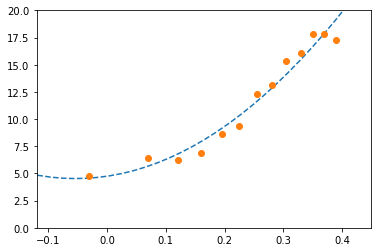

In [108]:
# polyfit

z = np.polyfit(colors, sigmas, 2)
p = np.poly1d(z)
xp = np.linspace(-0.5, 1.5, 100)
plt.plot(xp, p(xp), '--')
plt.plot(colors, sigmas, 'o')
plt.xlim(-0.12, 0.45)
plt.ylim(0, 20)

In [109]:
z

array([74.35425376,  8.00465465,  4.74364345])

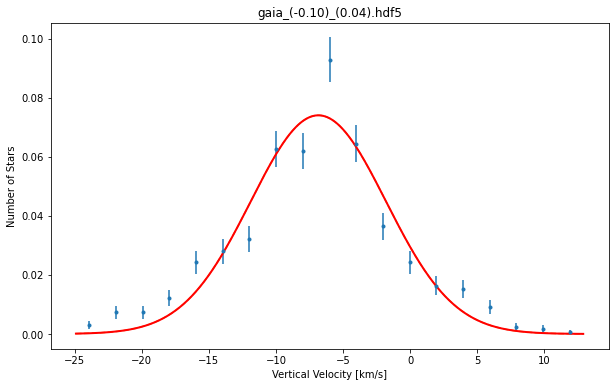

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

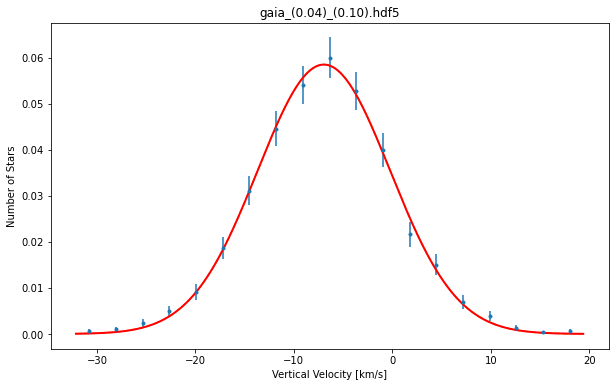

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

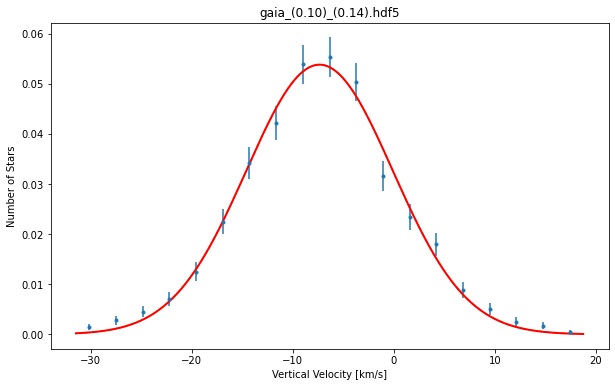

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

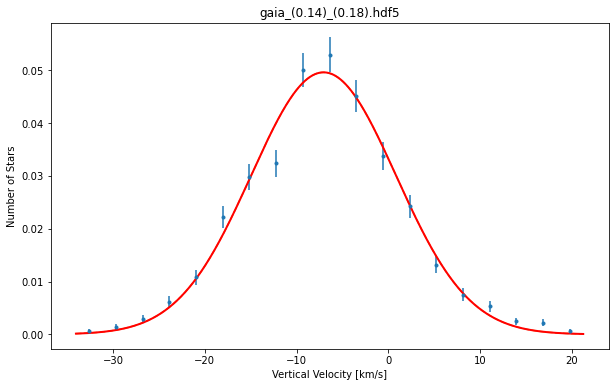

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

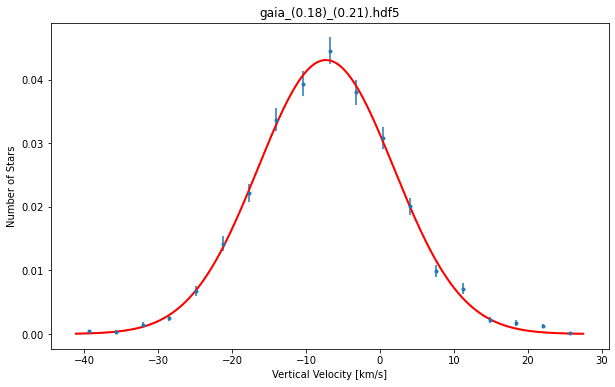

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

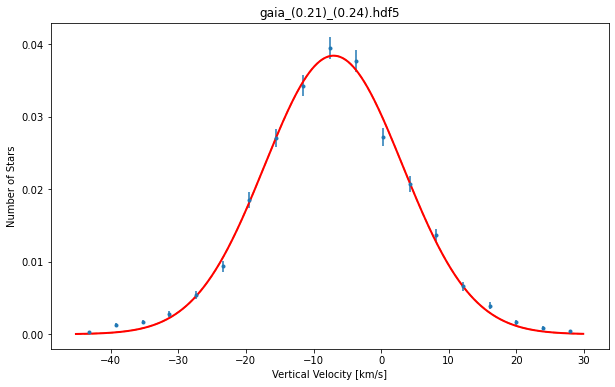

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

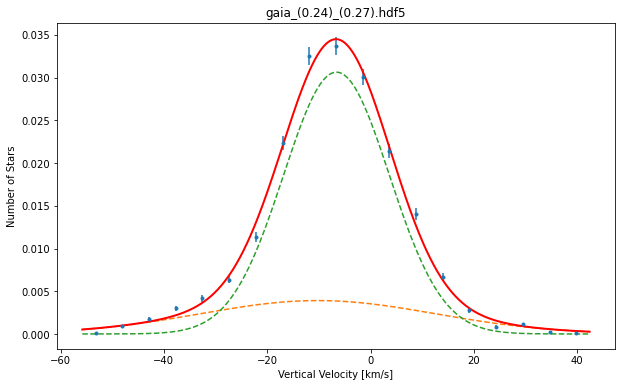

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

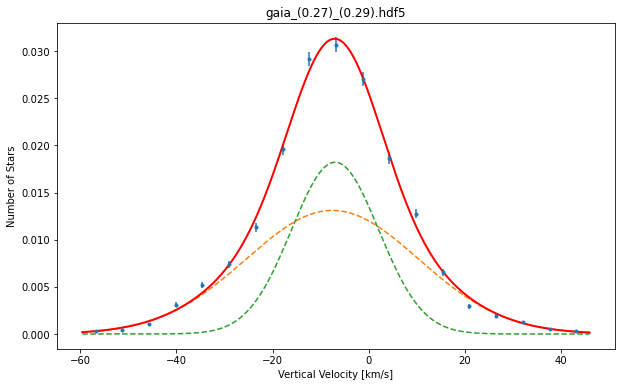

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

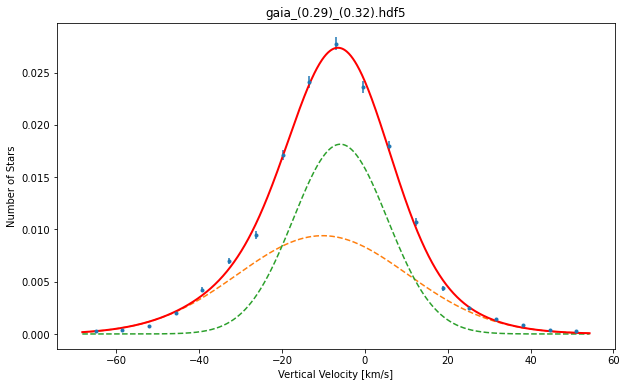

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

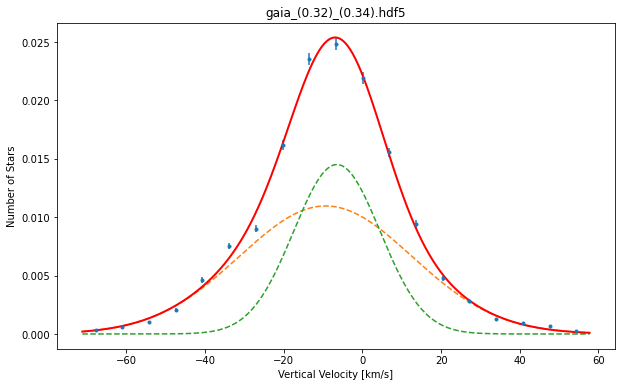

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

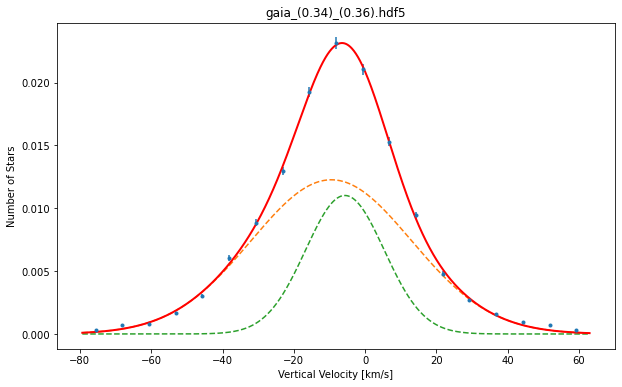

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

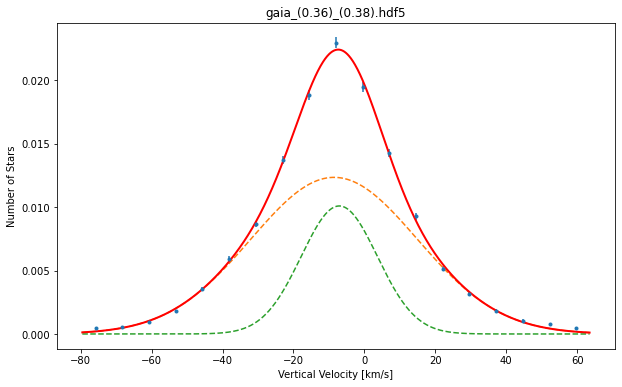

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

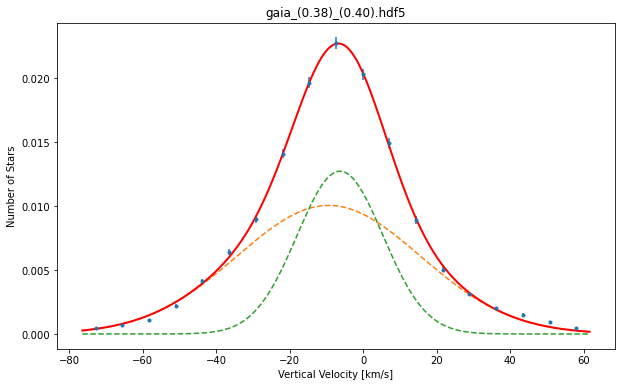

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [111]:
for file, popt, mu, sigma in zip(files, popts, mus, sigmas):
    gaia_raw = vaex.open(file)
    gaia = gaia_raw.filter("Dist>50")
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    wedge = np.linspace(mu-4*sigma, mu+4*sigma, 20)
    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = wnum > 0
    wmid = wmid[mask]
    wnum = wnum[mask]

    area = wnum.sum() * (wedge[1] - wedge[0])
    ws = np.linspace(mu-4*sigma, mu+4*sigma, 1000)
    
    werr = np.sqrt(wnum)

    popt_t, pcov = curve_fit(n_gaussian, wmid, wnum/area, p0=popt)
    fw = n_gaussian(ws, *popt_t)
    plt.figure(figsize=(10, 6))
    plt.errorbar(wmid, wnum/area, yerr=werr/area, fmt='.')

    
    for i in range(len(popt)//3):
        plt.plot(ws, popt_t[3*i]*norm.pdf(ws, popt_t[3*i+1], popt_t[3*i+2]), '--')
    plt.plot(ws, fw, c="r", lw=2)
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.title(file.split("/")[-1])
    plt.show()
    df = vaex.from_arrays(w=wmid, wnum=wnum/area, werr=werr/area)
    df_popt = vaex.from_arrays(popt=popt)

    df.export(join(data_dir, file.split("/")[-1]), progress=True)
    df_popt.export(join(data_dir, "popt_" + file.split("/")[-1]), progress=True)


# LOAD

In [32]:
files = glob(join(data_dir, "gaia_*.hdf5"))
files_popt = glob(join(data_dir, "popt_gaia_*.hdf5"))
files.sort()
files_popt.sort()

In [33]:
index = 0
file = files[index]
name = file.split("/")[-1]
df = vaex.open(file)
df

#,w,wnum,werr
0,-67.58620689655172,8.05376582981559e-05,5.6948724323511066e-05
1,-62.758620689655174,4.026882914907795e-05,4.026882914907795e-05
2,-53.10344827586207,4.026882914907795e-05,4.026882914907795e-05
3,-48.275862068965516,8.05376582981559e-05,5.6948724323511066e-05
4,-38.62068965517241,0.00024161297489446772,9.863808395455469e-05
...,...,...,...
17,24.137931034482754,0.0001610753165963118,8.05376582981559e-05
18,28.96551724137931,0.00012080648744723386,6.974765804751361e-05
19,33.79310344827586,8.05376582981559e-05,5.6948724323511066e-05
20,38.620689655172406,0.0001610753165963118,8.05376582981559e-05


In [36]:
df_popt = vaex.open(files_popt[index])
df_popt

#,popt
0,0.0794162
1,-6.31396
2,2.75079
3,0.911303
4,-7.25886
5,7.87733


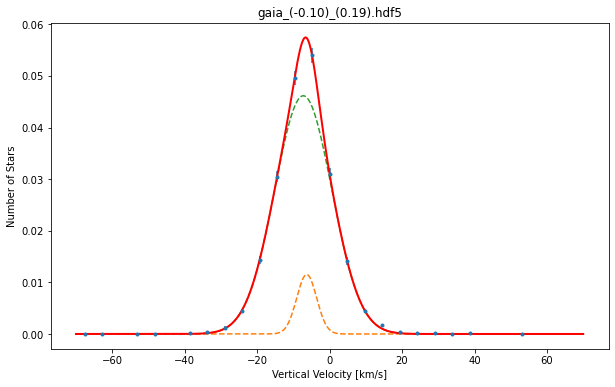

In [38]:
w = df['w'].to_numpy()
wnum = df['wnum'].to_numpy()
werr = df['werr'].to_numpy()

popt = df_popt['popt'].to_numpy()

ws = np.linspace(-70, 70, 1000)
fw = n_gaussian(ws, *popt)

plt.figure(figsize=(10, 6))
plt.errorbar(w, wnum, yerr=werr, fmt='.')
for i in range(len(popt)//3):
    plt.plot(ws, popt[3*i]*norm.pdf(ws, popt[3*i+1], popt[3*i+2]), '--')
plt.plot(ws, fw, c="r", lw=2)
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.title(name)
plt.show()

all in

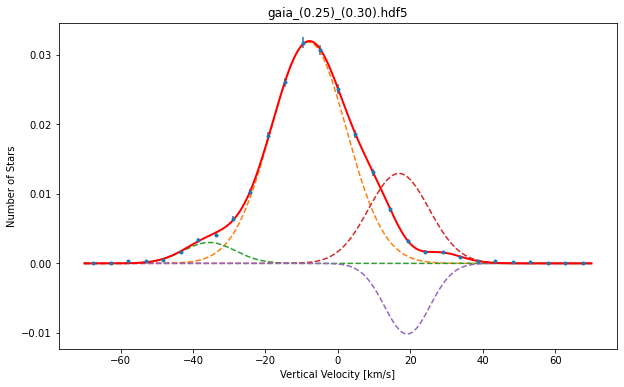

In [40]:
index = 2
file = files[index]
name = file.split("/")[-1]
df = vaex.open(file)

df_popt = vaex.open(files_popt[index])

w = df['w'].to_numpy()
wnum = df['wnum'].to_numpy()
werr = df['werr'].to_numpy()

popt = df_popt['popt'].to_numpy()

ws = np.linspace(-70, 70, 1000)
fw = n_gaussian(ws, *popt)

plt.figure(figsize=(10, 6))
plt.errorbar(w, wnum, yerr=werr, fmt='.')
for i in range(len(popt)//3):
    plt.plot(ws, popt[3*i]*norm.pdf(ws, popt[3*i+1], popt[3*i+2]), '--')
plt.plot(ws, fw, c="r", lw=2)
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.title(name)
plt.show()